# Age estimation of the customers

## Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [2]:
# Загрузка данных из файла labels.csv
labels_df = pd.read_csv('/datasets/faces/labels.csv')

# Посмотрим на первые несколько строк
print(labels_df.head())


    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17


In [ ]:
# Let's count the number of images in the dataset.
num_images = labels_df.shape[0]
print("Количество изображений в выборке:", num_images)


Количество изображений в выборке: 7591


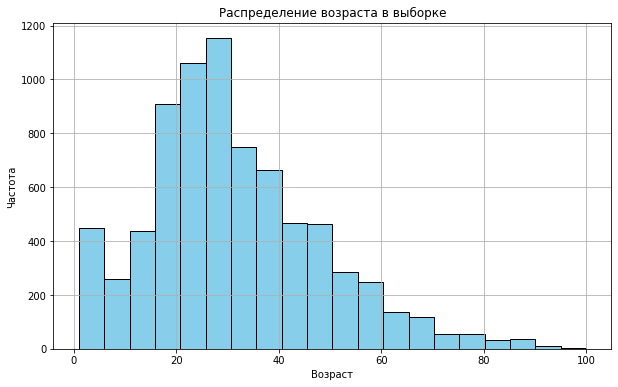

In [4]:
# Let's plot a histogram of age distribution.
plt.figure(figsize=(10, 6))
plt.hist(labels_df['real_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возраста в выборке')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

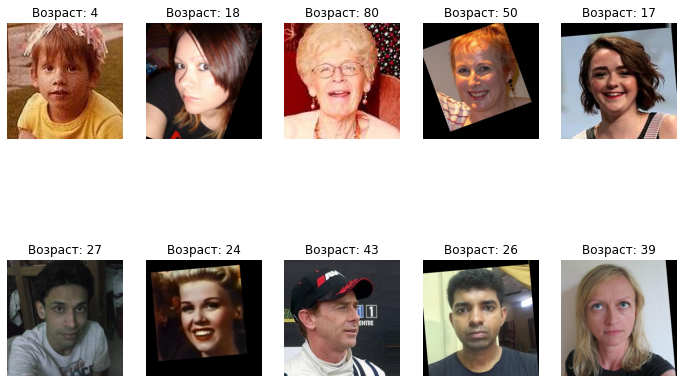

In [5]:
# Let's display a few photos.
image_dir = '/datasets/faces/final_files/'
plt.figure(figsize=(12, 8))
for i in range(10):
    file_name = labels_df.iloc[i, 0]
    age = labels_df.iloc[i, 1]
    image_path = image_dir + file_name
    image = Image.open(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(f'Возраст: {age}')
    plt.axis('off')
plt.show()

Conclusion:
Number of images: The dataset contains 7,591 images, providing a substantial amount of data for effective model training.

Age Distribution: The analysis of age distribution reveals that it is approximately normal with a right skew. There are noticeable spikes every 10 years, which may indicate the difficulty in labeling photos in between these intervals.

## Model training

Transfer the model training code and its output to the screen here.

(The code in this section runs in a separate GPU environment, so it is formatted as a text cell rather than a code cell.)

```python

# import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Flatten, AvgPool2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50


def load_train(path):
    labels = pd.read_csv(path+'labels.csv')
    train_datagen = ImageDataGenerator(rescale= 1./255, validation_split=0.25)
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        horizontal_flip=True,
        seed=42)
    return train_datagen_flow

def load_test(path):
    labels = pd.read_csv(path+'labels.csv')
    test_datagen = ImageDataGenerator(rescale= 1./255, validation_split=0.25)
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=42)

    return test_datagen_flow

def create_model(input_shape):

    backbone = ResNet50(input_shape= input_shape,
                    weights='imagenet',
                    include_top= False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mae'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data,
              validation_data= test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model

```

```

# Train for 178 steps, validate for 60 steps
Epoch 1/10
2024-02-04 09:17:58.561482: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-02-04 09:17:58.882696: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 67s - loss: 221.3718 - mae: 10.6930 - val_loss: 911.0149 - val_mae: 25.2492
Epoch 2/10
178/178 - 42s - loss: 59.0218 - mae: 5.8478 - val_loss: 683.9701 - val_mae: 21.0106
Epoch 3/10
178/178 - 41s - loss: 30.0752 - mae: 4.2109 - val_loss: 356.0959 - val_mae: 14.0948
Epoch 4/10
178/178 - 41s - loss: 20.4544 - mae: 3.4704 - val_loss: 157.4001 - val_mae: 9.2102
Epoch 5/10
178/178 - 41s - loss: 14.9396 - mae: 2.9947 - val_loss: 85.9630 - val_mae: 7.1431
Epoch 6/10
178/178 - 41s - loss: 12.4336 - mae: 2.7511 - val_loss: 73.6136 - val_mae: 6.6152
Epoch 7/10
178/178 - 40s - loss: 9.2274 - mae: 2.3342 - val_loss: 78.8012 - val_mae: 6.8921
Epoch 8/10
178/178 - 41s - loss: 9.5240 - mae: 2.3565 - val_loss: 68.7865 - val_mae: 6.2607
Epoch 9/10
178/178 - 40s - loss: 8.6161 - mae: 2.2311 - val_loss: 77.1480 - val_mae: 6.5398
Epoch 10/10
178/178 - 41s - loss: 6.7992 - mae: 1.9649 - val_loss: 70.1616 - val_mae: 6.2002
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 10s - loss: 70.1616 - mae: 6.2002
Test MAE: 6.2002
# < длинные строки со скачиванием модели можно удалить >

```

## Analysis of the trained model

The model shows promising results with a MAE of 6.2 on the test set, which meets the target MAE of less than 8. However, there are signs of overfitting, as evidenced by fluctuations and increasing losses on the validation set. Overall, the approach demonstrates successful application of a ResNet50-based convolutional neural network for age regression, but further optimization and experimentation are needed to achieve optimal results.